# Optimizer Regression   <a href="https://colab.research.google.com/github/Informa-Tiger/pytorch_projects/blob/master/Optimizer_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* In this notebook a polynomial model is trained to predict $\sin{x}$
* The class `PolynomialModel` inherits from `torch.nn.Module`
* it is trained using `torch.optim`

In [ ]:
import typing
from typing import Any, Union, Optional, List, Dict

import math
import numpy as np

import matplotlib.pyplot as plt

import torch
from torch import Tensor
from torch.nn import Module, MSELoss
from torch.optim import SGD, Optimizer

In [ ]:
class PolynomialModel (Module):
    weights: Tensor
    degree: int

    def __init__(self, degree: int):
        super().__init__()

        if (degree < 0):
            raise ValueError(f"degree must be a non-negative integer")
        self.degree = degree
        self.weights = torch.nn.Parameter(torch.rand(
            (degree+1,), dtype=torch.float, requires_grad=True))
        self.exponents = torch.linspace(0, degree, degree+1, dtype=torch.int)

    def forward(self, x: Tensor) -> Tensor:
        return x.unsqueeze(-1).pow(self.exponents) @ self.weights

    def string(self) -> str:
        return " + ".join([f"{self.weights[i]:.2f} x^{i}" for i in range(self.degree, 0, -1)] + [f"{self.weights[0]:.2f}"])


In [ ]:
def fit(model: Module, x: Tensor, y: Tensor, epochs: int = 2000, criterion: Optional[Module] = None, optimizer: Optional[Optimizer] = None,
        lr: float = 1e-6) -> np.ndarray:

    if (criterion is None):
        criterion = MSELoss(reduction='sum')
    if (optimizer is None):
        optimizer = SGD(model.parameters(), lr=lr)

    loss_history: np.ndarray = np.array([])

    for t in range(epochs):
        y_pred = model(x)
        loss = criterion(y_pred, y)
        if t % 10 == 0:
            loss_history = np.append(loss_history, loss.detach().numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return loss_history


In [ ]:
x = torch.linspace(-math.pi, math.pi, 2000, dtype=torch.float)
y = torch.sin(x)

In [ ]:
m: Module = PolynomialModel(3)

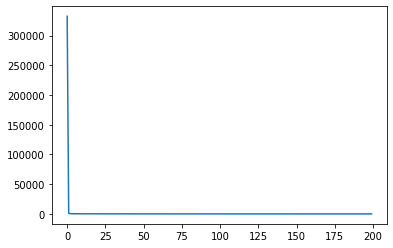

In [ ]:
plt.plot(fit(m,x,y, lr=1e-6))

-0.09 x^3 + -0.00 x^2 + 0.85 x^1 + 0.02


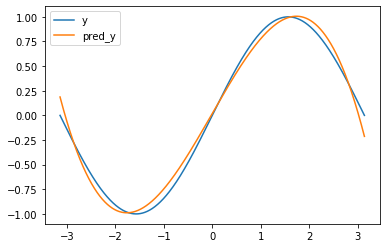

In [ ]:
print(m.string())

plt.plot(x, y, label="y")
plt.plot(x, m(x).detach(), label="pred_y")
plt.legend()